In [3]:
import pandas as pd 


import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import xgboost as xgb
import scikitplot as skplt

In [2]:
df= pd.read_csv('./data/positive_emotion_dataset_improved.csv')
nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df.dropna(subset = ["lemmatized"], inplace=True)
df

,ad,pos_emo,lemmatized
0,the union is empowering educators to make the ...,0,union empower educator law work student half t...
1,thank our nurses by supporting their call for ...,0,thank nurse support paid leave fall ill covid
2,better schools lower cost health care more o...,0,well school low cost health care opportuni...
3,the trump administration is plowing ahead with...,1,trump administration plow ahead social medium ...
4,are you ready to vote for ayanna on september ...,1,ready vote ayanna september th sure voice hear...
...,...,...,...
8318,discount month course of psychology basics t...,0,discount month course psychology basic thi...
8319,andrew gillum is running the most energized au...,1,andrew gillum run energized authentic progress...
8320,as a young black millennial im really excited ...,1,young black millennial m excited vote join las...
8321,it took thousands of hours of work by dedicate...,1,take thousand hour work dedicated austinite ex...


In [4]:
X_train,  X_test, y_train, y_test  = train_test_split(df['lemmatized'], df['pos_emo'], test_size =0.2  , random_state = 42)

In [5]:
# Use term frequency to represent documents
tf_vectorizer = TfidfVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [6]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

accuracy:   0.948
              precision    recall  f1-score   support

  no-pos_emo       0.89      0.95      0.92       509
     pos_emo       0.98      0.95      0.96      1155

    accuracy                           0.95      1664
   macro avg       0.93      0.95      0.94      1664
weighted avg       0.95      0.95      0.95      1664

confusion matrix:
[[ 484   25]
 [  61 1094]]



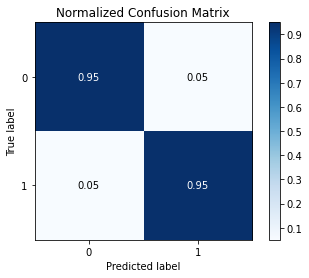

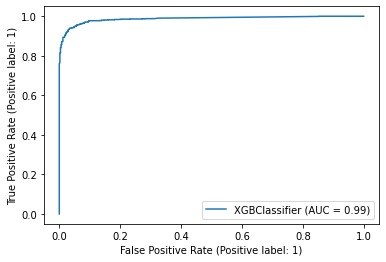

In [7]:
# predict the labels on validation dataset
predictions = xgb_clf.predict(X_test_tf)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, predictions, target_names=['no-pos_emo', 'pos_emo']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test_tf, y_test)

In [8]:
df_val = pd.read_csv('./data/sample_positive_emotion.csv')
df_val

,ad,pos_emo,lemmatized
0,see why everyone is celebrating at hoblit dodg...,1,see why everyone be celebrate at hoblit dodge ...
1,help give people without a home a chance to le...,0,help give people without a home a chance to le...
2,i am so proud of what this grassroots team has...,1,I be so proud of what this grassroot team have...
3,we have until march st to raise money for our ...,0,we have until march st to raise money for our ...
4,learn how to use the new staffing law to impro...,0,learn how to use the new staffing law to impro...
...,...,...,...
145,let us build cameroon wake up cameroonians and...,0,let we build cameroon wake up cameroonian and ...
146,studies show that of all children possess crea...,1,study show that of all child possess creative ...
147,if you are a developer who wants to make a dif...,1,if you be a developer who want to make a diffe...
148,learn the greatest tips tricks from the world ...,1,learn the great tip trick from the world be mo...


accuracy:   0.513
              precision    recall  f1-score   support

      no-pos       0.78      0.50      0.61       115
         pos       0.25      0.54      0.34        35

    accuracy                           0.51       150
   macro avg       0.52      0.52      0.48       150
weighted avg       0.66      0.51      0.55       150

confusion matrix:
[[58 57]
 [16 19]]



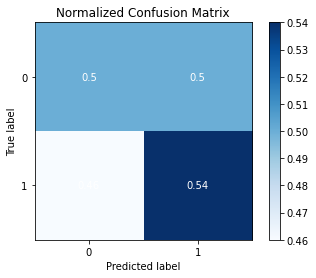

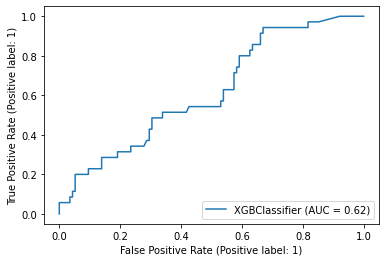

In [9]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['pos_emo']

y_pred = xgb_clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-pos', 'pos']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_val, y_val)